<a href="https://colab.research.google.com/github/me-t1me/DIP_assignment_2/blob/master/DIP_2_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse

In [25]:
!wget "https://raw.githubusercontent.com/me-t1me/DIP_assignment_2/master/xray.png"
!wget "https://raw.githubusercontent.com/me-t1me/DIP_assignment_2/master/xray_sp.png"

--2023-04-23 07:22:45--  https://raw.githubusercontent.com/me-t1me/DIP_assignment_2/master/xray.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 369053 (360K) [image/png]
Saving to: ‘xray.png.1’

xray.png.1          100%[===================>] 360.40K  --.-KB/s    in 0.04s   

2023-04-23 07:22:45 (9.18 MB/s) - ‘xray.png.1’ saved [369053/369053]

--2023-04-23 07:22:45--  https://raw.githubusercontent.com/me-t1me/DIP_assignment_2/master/xray_sp.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 397248 (388K) [image/png]
Saving to

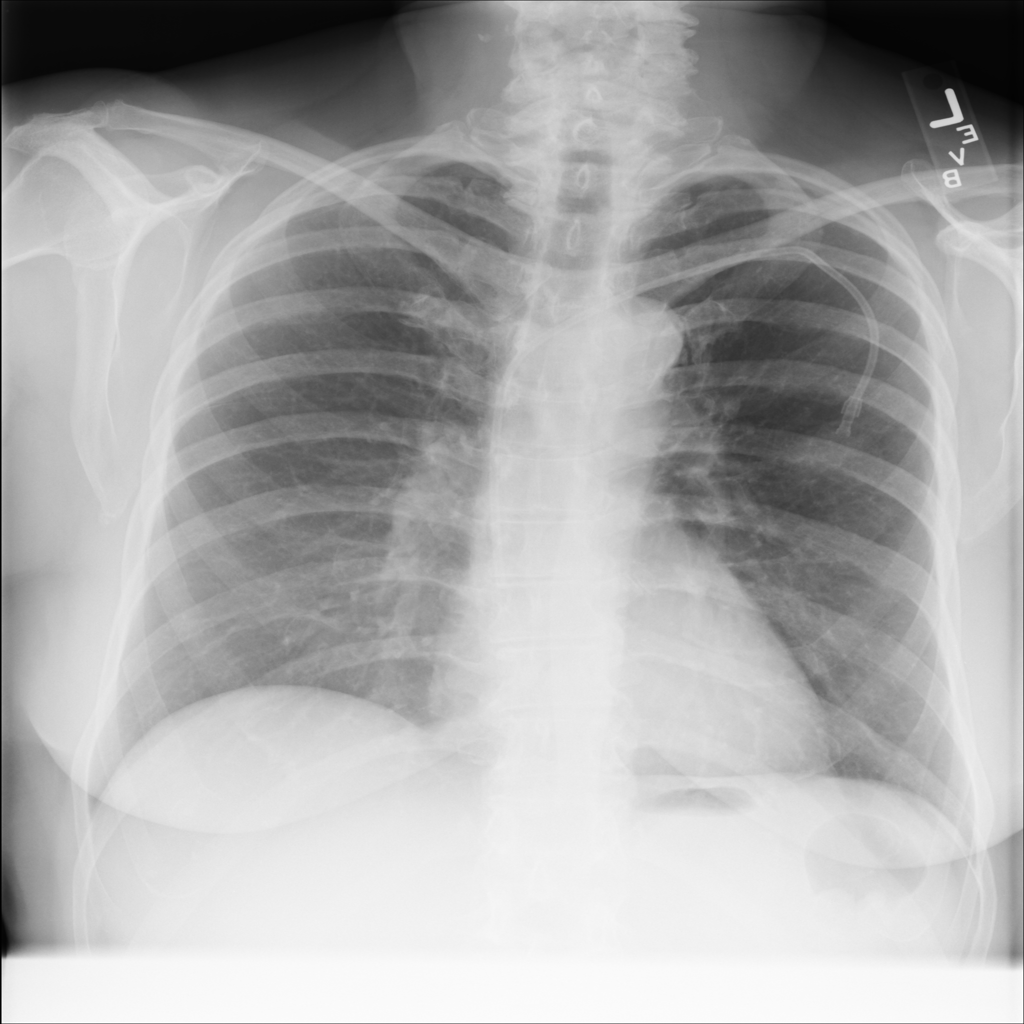

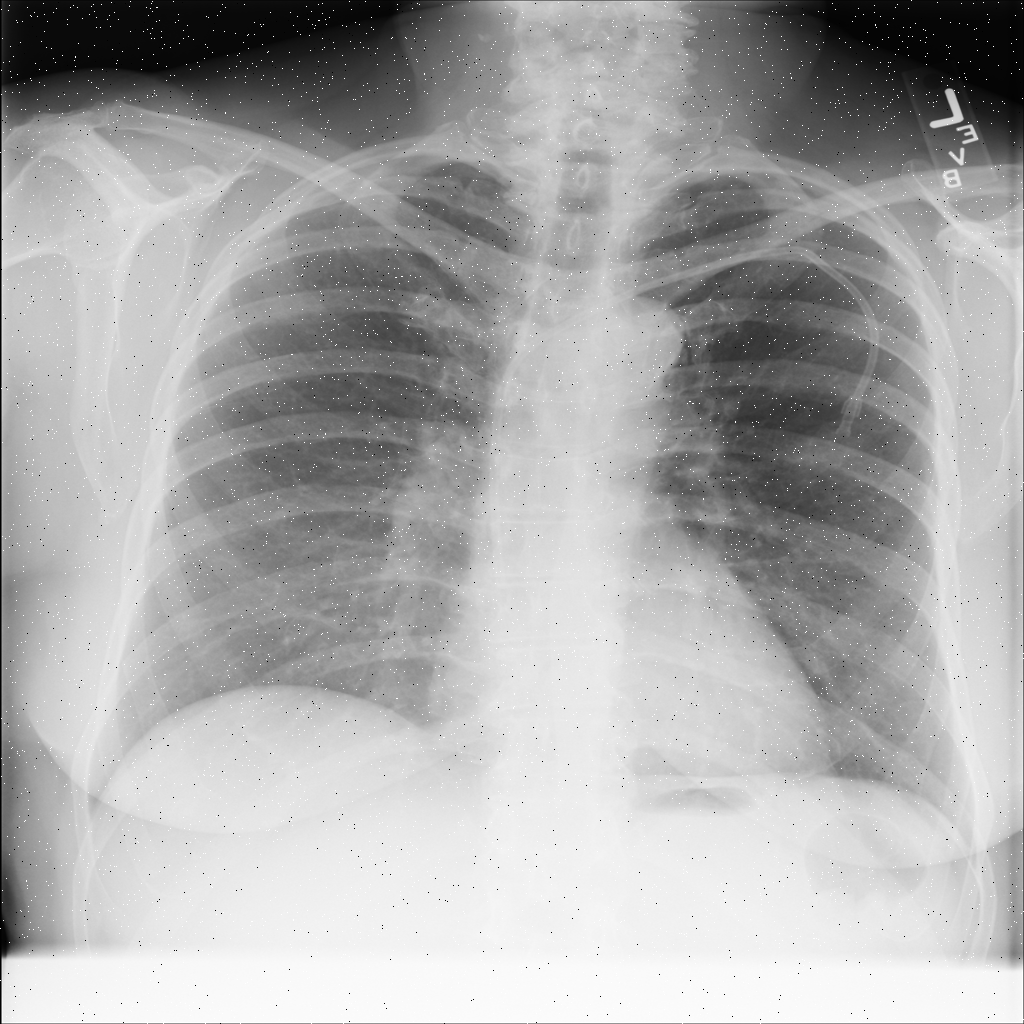

In [26]:
# Load the original X-ray image
img = cv2.imread('xray.png', 0)

# Load the salt & pepper noise-based contaminated X-ray image
img_sp = cv2.imread('xray_sp.png', 0)

In [28]:
# appling a 5 by 5 filter
# Apply median filter to the contaminated X-ray image
img_median = cv2.medianBlur(img_sp, 5)

# Apply max filter to the contaminated X-ray image
kernel = np.ones((5, 5), np.uint8)
img_max = cv2.dilate(img_sp, kernel, iterations=1)

# Apply min filter to the contaminated X-ray image
img_min = cv2.erode(img_sp, kernel, iterations=1)

# Apply alpha-trimmed mean filter to the contaminated X-ray image
img_at_mean = cv2.boxFilter(img_sp, -1, (5,5), normalize=False)

# Evaluate the SNR and RMSE values for the filtered images using the original X-ray image as a reference
snr_median = psnr(img, img_median)
rmse_median = np.sqrt(mse(img, img_median))

snr_max = psnr(img, img_max)
rmse_max = np.sqrt(mse(img, img_max))

snr_min = psnr(img, img_min)
rmse_min = np.sqrt(mse(img, img_min))

snr_at_mean = psnr(img, img_at_mean)
rmse_at_mean = np.sqrt(mse(img, img_at_mean))

print("SNR Median: ", snr_median)
print("RMSE Median: ", rmse_median)

print("SNR Max: ", snr_max)
print("RMSE Max: ", rmse_max)

print("SNR Min: ", snr_min)
print("RMSE Min: ", rmse_min)

print("SNR Alpha-Trimmed Mean: ", snr_at_mean)
print("RMSE Alpha-Trimmed Mean: ", rmse_at_mean)


SNR Median:  42.85780957655558
RMSE Median:  1.8350576037270825
SNR Max:  15.720204776807723
RMSE Max:  41.73783728185364
SNR Min:  17.820122479514822
RMSE Min:  32.774347675038356
SNR Alpha-Trimmed Mean:  7.937726162694661
RMSE Alpha-Trimmed Mean:  102.2477764456809
